In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img,ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense,BatchNormalization,Dropout
from keras.optimizers import Adam


In [11]:
InputPath = []
label = []
sourceFileDir = os.path.dirname(os.path.abspath("__file__"))
print(sourceFileDir)
for Class in os.listdir(os.path.join(sourceFileDir,"Emotions")):
    print(Class)
    for path in os.listdir(os.path.join(sourceFileDir,"Emotions",Class)):
        if Class == 'happy':
            label.append(0)
        elif Class == 'neutral':
            label.append(1)
        else:
            label.append(2)
        InputPath.append(os.path.join("Emotions", Class, path))
print(label)



c:\Users\3boood\CNN
happy
neutral
sad
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [12]:
df = pd.DataFrame()
df['images'] = InputPath
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,Emotions\neutral\26884.jpg,1
1,Emotions\neutral\35208.jpg,1
2,Emotions\happy\13819.jpg,0
3,Emotions\sad\29982.jpg,2
4,Emotions\neutral\6648.jpg,1


<Axes: xlabel='label', ylabel='count'>

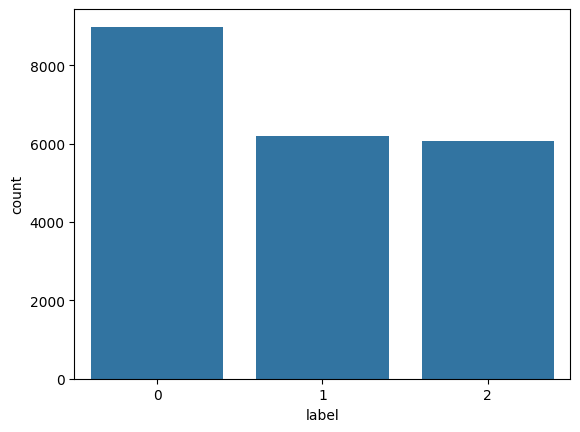

In [13]:
import seaborn as sns
sns.countplot(data=df,x='label')

In [14]:
df["label"]

0        1
1        1
2        0
3        2
4        1
        ..
21259    0
21260    0
21261    0
21262    0
21263    0
Name: label, Length: 21264, dtype: int64

In [19]:
# df['label'] = df['label'].astype('str')
df['label'] = df['label'].map({0: 'a', 1: 'b', 2: 'c', 3: 'd'})


In [20]:
df["label"]


0        b
1        b
2        a
3        c
4        b
        ..
21259    a
21260    a
21261    a
21262    a
21263    a
Name: label, Length: 21264, dtype: object

In [16]:
train, test = train_test_split(df, test_size=0.3, random_state=1)

In [17]:
train

,images,label
15753,Emotions\neutral\34228.jpg,1
530,Emotions\happy\7930.jpg,0
19674,Emotions\sad\15026.jpg,2
5195,Emotions\neutral\26524.jpg,1
6700,Emotions\neutral\12531.jpg,1
...,...,...
10955,Emotions\neutral\17861.jpg,1
17289,Emotions\happy\23864.jpg,0
5192,Emotions\happy\16238.jpg,0
12172,Emotions\happy\28823.jpg,0


In [21]:
TrainGenerator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
ValGenerator = ImageDataGenerator(rescale = 1./255)

TrainIterator = TrainGenerator.flow_from_dataframe(
    df, 
    x_col='images', 
    y_col='label', 
    target_size=(48,48), 
    batch_size=64, 
    class_mode='categorical'
)
ValIterator = ValGenerator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(48,48), 
    batch_size=64, 
    class_mode='categorical'
)

Found 21264 validated image filenames belonging to 3 classes.


TypeError: If class_mode="categorical", y_col="label" column values must be type string, list or tuple.

In [74]:
model = Sequential([
                    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,3)),
                    BatchNormalization(),
                    MaxPool2D((2,2)),
                    Conv2D(128, (3,3), activation='relu'),
                    BatchNormalization(),
                    MaxPool2D((2,2)),
                    Conv2D(256, (3,3), activation='relu'),
                    BatchNormalization(),
                    MaxPool2D((2,2)),

                    
                    Flatten(),
                    Dense(256,activation='relu'),
                    Dropout(0.2),
                    Dense(128,activation='relu'),
                    Dropout(0.3),
                    
                    Dense(3, activation='softmax'),
])

In [75]:
model.compile(optimizer=Adam(learning_rate=0.0008)
              , loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 46, 46, 64)        1792      
                                                                 
 batch_normalization_3 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 batch_normalization_4 (Bat  (None, 21, 21, 128)       512       
 chNormalization)                                                
                                                      

Total params: 1454723 (5.55 MB)
Trainable params: 1453827 (5.55 MB)
Non-trainable params: 896 (3.50 KB)
_________________________________________________________________


In [76]:
history = model.fit(TrainIterator, epochs=100, validation_data=ValIterator)


Epoch 1/100
333/333 [==============================] - 28s 73ms/step - loss: 1.1073 - accuracy: 0.4519 - val_loss: 1.0406 - val_accuracy: 0.4519
Epoch 2/100
333/333 [==============================] - 26s 79ms/step - loss: 0.9090 - accuracy: 0.5579 - val_loss: 0.8824 - val_accuracy: 0.5629
Epoch 3/100
333/333 [==============================] - 26s 78ms/step - loss: 0.8383 - accuracy: 0.6016 - val_loss: 0.7730 - val_accuracy: 0.6428
Epoch 4/100
333/333 [==============================] - 23s 69ms/step - loss: 0.7829 - accuracy: 0.6414 - val_loss: 0.7992 - val_accuracy: 0.6354
Epoch 5/100
333/333 [==============================] - 24s 73ms/step - loss: 0.7367 - accuracy: 0.6640 - val_loss: 0.8866 - val_accuracy: 0.5745
Epoch 6/100
333/333 [==============================] - 23s 70ms/step - loss: 0.7136 - accuracy: 0.6738 - val_loss: 0.8427 - val_accuracy: 0.6303
Epoch 7/100
333/333 [==============================] - 23s 70ms/step - loss: 0.6923 - accuracy: 0.6897 - val_loss: 0.6434 - val_ac

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
print(acc)
print(val_acc)

[0.45193755626678467, 0.5578912496566772, 0.6015801429748535, 0.6413657069206238, 0.663986086845398, 0.6738148927688599, 0.6897103190422058, 0.7003856301307678, 0.7041008472442627, 0.7148231863975525, 0.7205135226249695, 0.7263450026512146, 0.7282731533050537, 0.7384781837463379, 0.7318472266197205, 0.7365970611572266, 0.745673418045044, 0.7477426528930664, 0.7512227296829224, 0.7521162629127502, 0.7523984313011169, 0.7575244307518005, 0.7608163952827454, 0.7609104514122009, 0.7700808644294739, 0.7681057453155518, 0.7716798186302185, 0.7677295207977295, 0.7746425867080688, 0.7781226634979248, 0.7788280844688416, 0.7812265157699585, 0.7859762907028198, 0.786164402961731, 0.7888450026512146, 0.7838600277900696, 0.7910082936286926, 0.7958991527557373, 0.7940650582313538, 0.795758068561554, 0.7962753772735596, 0.7999905943870544, 0.8019187450408936, 0.8032825589179993, 0.8044582605361938, 0.8008370995521545, 0.8079853057861328, 0.8118886351585388, 0.8099604845046997, 0.8080323338508606, 0.

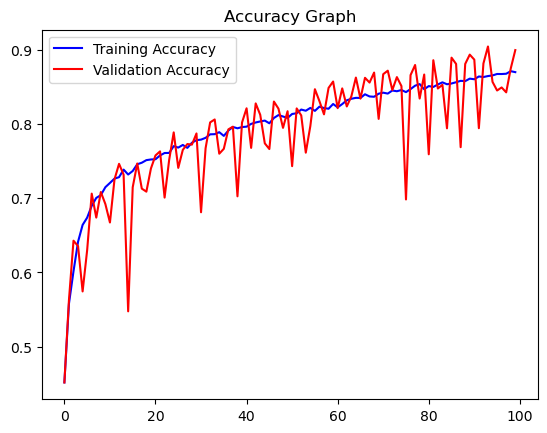

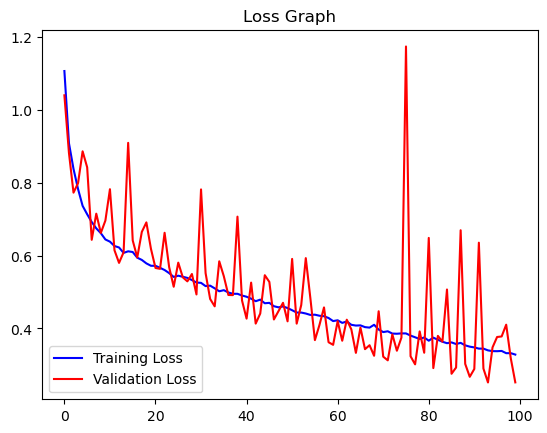

In [78]:
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
model.save("Emotions8.h5")
model.save("Emotions8.keras")


/home/abdulrahman/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


" from keras.models import load_model\n\nmodel = load_model('my_model.sh5')\nmodel.summary() "